In [116]:
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

In [117]:
plt.rcParams.update({'font.size': 14, "font.family": "Times New Roman"})

In [118]:
def read_log(path):
    with open(path, "r") as f:
        lines = f.readlines()

    runtimes = dict()

    for line in lines:
        k, num_of_points, runtime = line.split(",")
        runtime = float(runtime)

        if k not in runtimes:
            runtimes[k] = dict()

        if num_of_points not in runtimes[k]:
            runtimes[k][num_of_points] = {"runtimes": []}

        runtimes[k][num_of_points]["runtimes"].append(runtime)

    for k in runtimes.keys():
        for num_of_points in runtimes[k].keys():
            rt = np.array(runtimes[k][num_of_points]["runtimes"])
            mean = rt.mean()
            std = ((rt - mean)**2).mean()
            runtimes[k][num_of_points]["mean"] = mean
            runtimes[k][num_of_points]["std"] = std

    return runtimes

In [111]:
log_files = [
    "../logs/ours/without_caching.csv",
    # "../logs/ours/with_caching.csv",
    "../logs/related_works/enclosing1998/speedTest.csv",
    "../logs/related_works/smallest2019/divide_and_conquer.csv",
]

labels = {
    "../logs/ours/without_caching.csv": "ours (w/o caching)",
    # "../logs/ours/with_caching.csv": "ours (w caching)",
    "../logs/related_works/enclosing1998/speedTest.csv": "enclosing1998",
    "../logs/related_works/smallest2019/divide_and_conquer.csv": "smallest2019",
}

In [112]:
runtimes = {
    path: read_log(path)
    for path in log_files
}

In [113]:
runtimes = {
    f"{k}": {
        name: {
            "index": [
                num_of_points
                for num_of_points in range(500, 10001, 500)
                for _ in runtimes[name][f"{k}"][f"{num_of_points}"]["runtimes"]
            ],

            "runtimes": [
                rt
                for num_of_points in range(500, 10001, 500)
                for rt in runtimes[name][f"{k}"][f"{num_of_points}"]["runtimes"]
            ]
        }
        for name in runtimes.keys()
    }
    for k in range(5, 31, 5)
}

In [114]:
runtimes.keys()

dict_keys(['5', '10', '15', '20', '25', '30'])

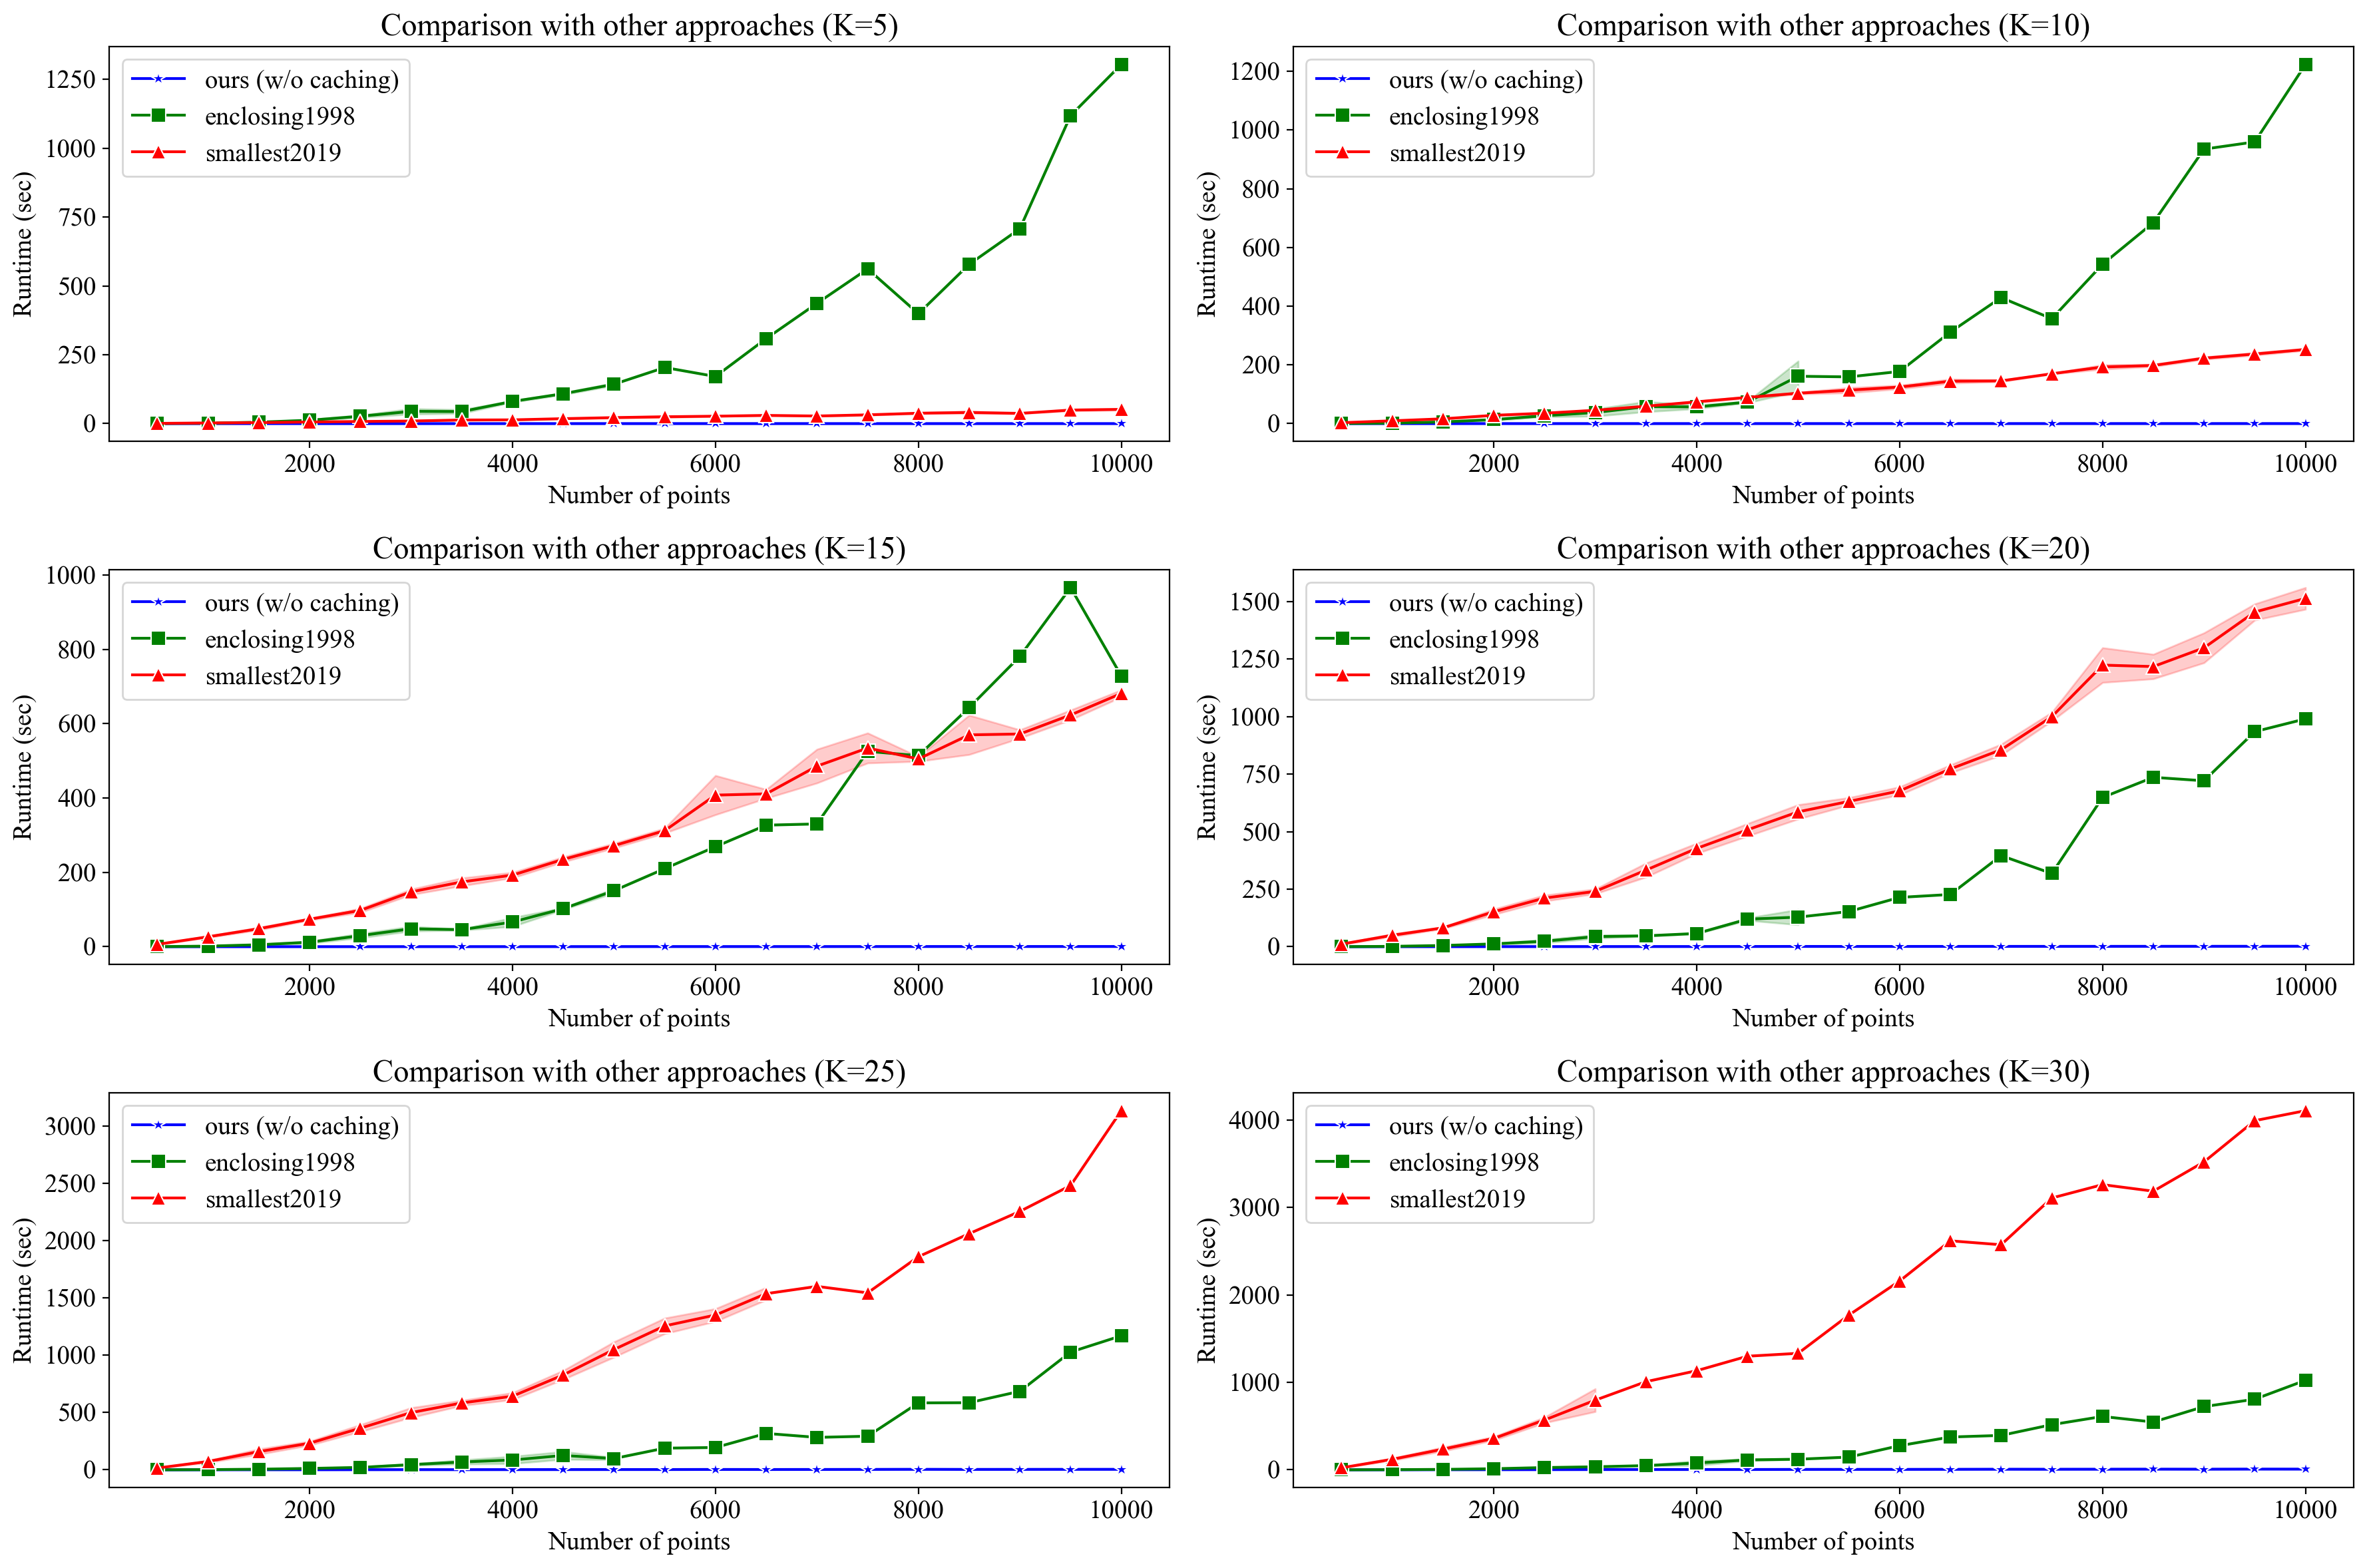

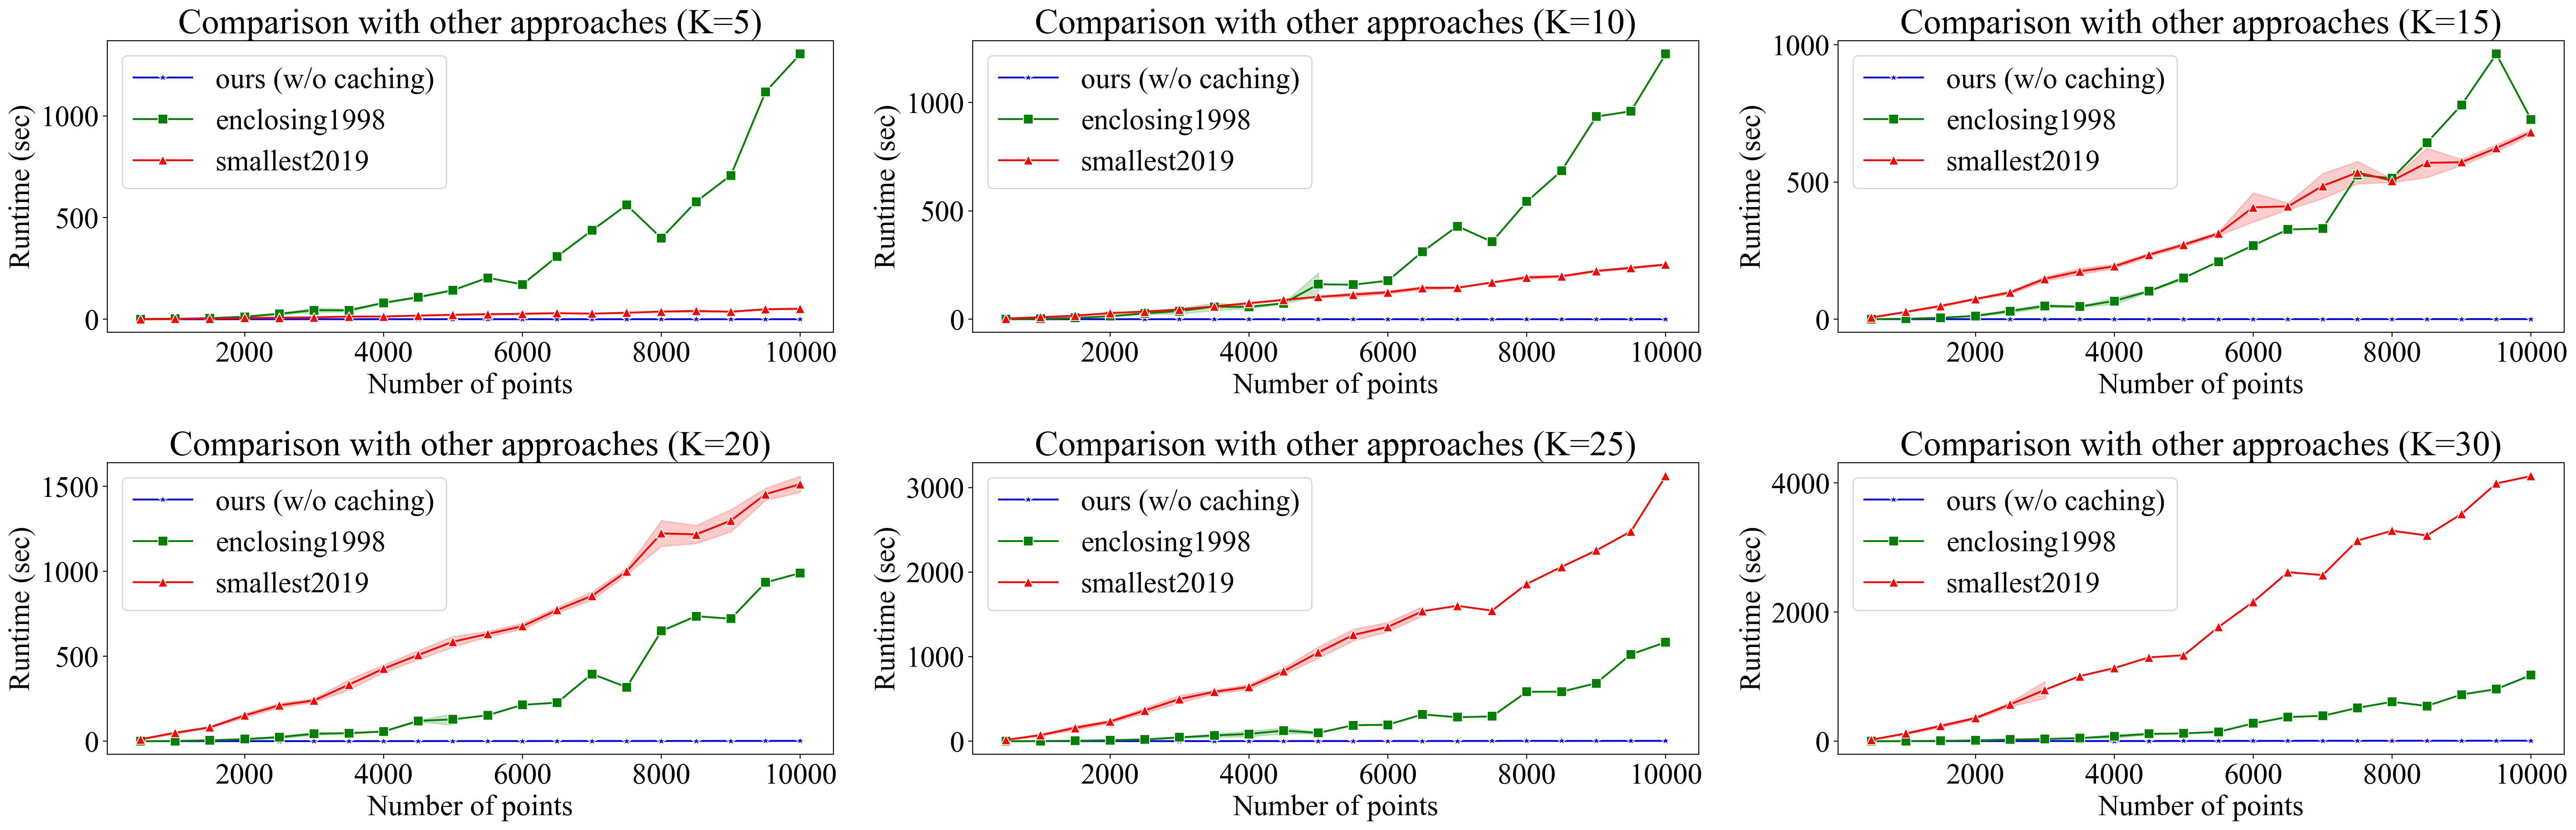

In [124]:
colors = {
    "../logs/ours/without_caching.csv": "blue",
    # "../logs/ours/with_caching.csv": "*",
    "../logs/related_works/enclosing1998/speedTest.csv": "green",
    "../logs/related_works/smallest2019/divide_and_conquer.csv": "red",

    "../logs/ours/city_Lousiville_escooter_trip_start_streaming_K10_cache_true-2019-1.txt": "orange",
    "../logs/ours/city_Lousiville_escooter_trip_start_streaming_K10_cache_false-2019-1.txt": "blue",
    "../logs/related_works/enclosing1998/city_Lousiville_escooter_trip_start_streaming_K10-2019-1.txt": "green",
    "../logs/related_works/smallest2019/city_Lousiville_escooter_trip_start_streaming_K10-2019-1.txt": "red",
}

markers = {
    "../logs/ours/without_caching.csv": "*",
    # "../logs/ours/with_caching.csv": "o",
    "../logs/related_works/enclosing1998/speedTest.csv": "s",
    "../logs/related_works/smallest2019/divide_and_conquer.csv": "^",
}

plt.rcParams.update({'font.size': 14, "font.family": "Times New Roman"})
plt.figure(figsize=(18, 12), dpi=200)

for i, k in enumerate(range(5, 31, 5)):
    plt.subplot(3, 2, i+1)
    for name in runtimes[f"{k}"].keys():
        sns.lineplot(data=runtimes[f"{k}"][name], x="index", y="runtimes", 
                     estimator=np.mean, errorbar="sd", label=labels[name], 
                     marker=markers[name], ms=8,
                     linestyle="-", color=colors[name])

    plt.legend()
    plt.xlabel("Number of points")
    plt.ylabel("Runtime (sec)")
    plt.title(f"Comparison with other approaches (K={k})")

plt.tight_layout()
plt.savefig("runtime_comparison_3x2.png")
plt.show()

plt.rcParams.update({'font.size': 24, "font.family": "Times New Roman"})
plt.figure(figsize=(30, 10), dpi=200)

for i, k in enumerate(range(5, 31, 5)):
    plt.subplot(2, 3, i+1)
    for name in runtimes[f"{k}"].keys():
        sns.lineplot(data=runtimes[f"{k}"][name], x="index", y="runtimes", 
                     estimator=np.mean, errorbar="sd", label=labels[name], 
                     marker=markers[name], ms=8,
                     linestyle="-", color=colors[name])

    plt.legend()
    plt.xlabel("Number of points")
    plt.ylabel("Runtime (sec)")
    plt.title(f"Comparison with other approaches (K={k})")

plt.tight_layout()
plt.savefig("runtime_comparison_2x3.png")
plt.show()

# plt.subplot(1, 2, 2)

# for name in ["../logs/ours/with_caching.csv", "../logs/ours/without_caching.csv"]:
#     sns.lineplot(data=runtimes_k20[name], x="index", y="runtimes", 
#                  estimator=np.mean, errorbar="sd", label=labels[name], 
#                  marker=markers[name], ms=8,
#                  linestyle="-")

# plt.legend()
# plt.title("Runtime comparison with and without caching")
# plt.xlabel("Number of points")
# plt.ylabel("Runtime (sec)")
# plt.show()